**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 05: Análisis Exploratorio de Datos (EDA)

Luego de realizar la limpieza y ajustes sobre los datos de entrada, se debe seleccionar las mejores variables predictoras, que conformarán los *features* del modelo.

Es importante tener en cuenta en esta fase que existen diferentes métodos estadísticos que ayudan a identificar dichas variables, sin embargo el mejor método es una buena comprensión del problema y de las variables a utilizar.

A continuación se describen inicialmente los métodos para conocer cada una de las variables, y su relación con las demás variables. Y finalmente se presentan métodos para identificar de forma automática las mejores variables predictoras. Recuerde que dichos métodos no son mas que herramientas estadísticas que le pueden proporcionar informacion importante, pero la mejor selección la debe hacer el usuario considerando toda la información obtenida de las diferentes variables.

## Importar librerias

Importar los ficheros necesarios

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from osgeo import gdal

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importar datos

importar en python los mapas raster

In [5]:
ruta='/content/drive/MyDrive/CATEDRA/CARTOGRAFIA GEOTECNICA/cartoGeotecnia_book/_build/html/data/miel/'

In [17]:
file = gdal.Open(ruta+'Aspecto.tif')
raster = file.GetRasterBand(1)
aspecto = raster.ReadAsArray()
aspecto=np.where(aspecto==-999.,np.nan,aspecto)

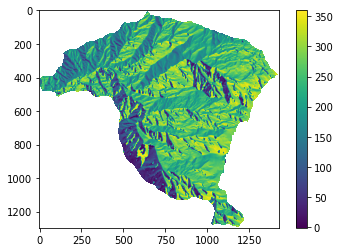

In [18]:
plt.imshow(aspecto)
plt.colorbar()


In [ ]:

aspecto=np.where(aspecto==-999,np.nan,aspecto)
print('Dimensiones de la matriz del mapa de aspecto:', aspecto.shape)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
print('Dimensiones del vector de aspecto:',aspecto_vector_MenM.shape)

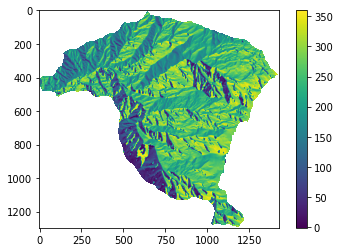

In [ ]:
plt.imshow(aspecto)
plt.colorbar()

Antes de generar el dataframe con las diferentes variables, es necesario entonces importar todas las variables y realizar los ajustes que sean necesarios.

In [ ]:
file = gdal.Open(ruta+'CurvaturaPerfil.tif')
raster = file.GetRasterBand(1)
curvatura = raster.ReadAsArray()
curvatura = np.where(curvatura==-999,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
print('Dimensiones del vector de curvatura:',curvatura_vector_MenM.shape)

Dimensiones del vector de curvatura: (910801,)


In [ ]:
file = gdal.Open(ruta+'FlujoAcumulado.tif')
raster = file.GetRasterBand(1)
flujo = raster.ReadAsArray()
flujo = np.where(flujo==-999,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
print('Dimensiones del vector de flujo:',flujo_vector_MenM.shape)

Dimensiones del vector de flujo: (910801,)


In [ ]:
file = gdal.Open(ruta+'Geologia_Superficial.tif')
raster = file.GetRasterBand(1)
geologia = raster.ReadAsArray()
geologia = np.where(geologia==-999,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print('Dimensiones del vector de geología:',geologia_vector_MenM.shape)

Dimensiones del vector de geología: (910801,)


In [ ]:
file = gdal.Open(ruta+'Pendiente.tif')
raster = file.GetRasterBand(1)
pendiente1 = raster.ReadAsArray()
pendiente = np.where(pendiente1==-999,np.nan,pendiente1)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
print('Dimensiones del vector de pendiente:',pendiente_vector_MenM.shape)

Dimensiones del vector de pendiente: (910801,)


In [ ]:
file = gdal.Open(ruta+'Inventario_MenM.tif')
raster = file.GetRasterBand(1)
inventario = raster.ReadAsArray()
inventario=np.where(pendiente1!=-999.0,inventario,np.nan)
print('Dimensiones de la matriz del inventario:', inventario.shape)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
inventario_vector_MenM.shape
print('Dimensiones del vector de inventario:',inventario_vector_MenM.shape)

Dimensiones de la matriz del inventario: (1297, 1430)
Dimensiones del vector de inventario: (910801,)


Con cada uno de los vectores de las variables independientes y dependiente, se conforma un diccionario, para luego formar un DataFrame con todas las variables, y posteriormente armar un DataFrame solo con las variables predictoras (X) y un vector con la variable dependiente (y).

In [ ]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))
X=df.drop('inventario',axis=1)
print(X.columns)
print('Número de filas y columnas de los features:', X.shape)
y=df['inventario']
print('Número de filas del label:',y.shape)

['inventario', 'pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura']
Index(['pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura'], dtype='object')
Número de filas y columnas de los features: (910801, 5)
Número de filas del label: (910801,)


In [ ]:
X.head()

,pendiente,geologia,flujo,aspecto,curvatura
0,10.862183,14.0,0.0,208.523560,-13.435433
1,12.265345,14.0,0.0,207.437332,-15.551539
2,12.469252,14.0,0.0,202.684647,-17.843397
3,13.148026,14.0,0.0,211.619766,-15.778575
4,14.091524,14.0,0.0,220.028976,-13.046625


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: inventario, dtype: float64

Es importante tambien crear una matriz solo con las variables predictoras continuas, ya que muchos de los métodos a utilizar solo trabajan con este tipo de variables.

In [ ]:
X_cont=X.drop(['geologia'],axis=1)
X_array_cont=X.values
X_cont.head()

,pendiente,flujo,aspecto,curvatura
0,10.862183,0.0,208.523560,-13.435433
1,12.265345,0.0,207.437332,-15.551539
2,12.469252,0.0,202.684647,-17.843397
3,13.148026,0.0,211.619766,-15.778575
4,14.091524,0.0,220.028976,-13.046625


Para obtener los estadísticos básicos de todas las variables continuas se utiliza

In [ ]:
print(X_cont.describe().T)

              count         mean           std         min         25%  \
pendiente  910801.0    29.091623     11.522072    0.000000   21.586218   
flujo      910801.0  2910.610840  96535.351562    0.000000    4.000000   
aspecto    910801.0   213.760437    100.318275   -1.000000  154.172882   
curvatura  910801.0     0.000519      6.661425 -425.963684   -1.282190   

                  50%         75%           max  
pendiente   29.483625   36.847805  7.789451e+01  
flujo       11.000000   26.000000  5.650063e+06  
aspecto    237.852829  291.331726  3.599995e+02  
curvatura   -0.025257    1.062094  4.648697e+02  


El problema a resolver corresponde a un método supervisado tipo clasificación, donde la variable dependiente es categórica dicotómica (la ocurrencia o no de movimientos en masa en una celda), por lo tanto es útil conocer el número de celdas con y sin MenM que permitirá entrenar el modelo.

In [ ]:
y.value_counts()

0.0    909181
1.0      1620
Name: inventario, dtype: int64

Para saber la media de cada variable independiente de acuerdo con la variable dependiente. Para esto utilizamos el DataFrame inicial (df) donde se agruparon todas las variables. 

In [ ]:
media=df.groupby('inventario').mean()
print(media)

            pendiente   geologia        flujo     aspecto  curvatura
inventario                                                          
0.0         29.082050  10.233438  2915.758057  213.785950   0.001642
1.0         34.459793   8.787037    21.809259  199.425674  -0.629323


Inicialmente para conocer el comportamiento bivariado de todas las variables se utiliza la matriz de scattering con Panda. Sin embargo tenga en cuenta que este método toma tiempo en ejecutarse.

In [ ]:
pd.plotting.scatter_matrix(X_cont, alpha = 0.3, figsize = (14,10), diagonal='kde');

La librería de *Seaborn* es similar a Matplotlib, sin embargo presenta gráficas con mejores diseños. La matriz de scattering utilizando *Seaborn* se genera de la siguiente manera, y de forma similar al caso anterior toma tiempo.

In [ ]:
sns.pairplot(df, hue='inventario');

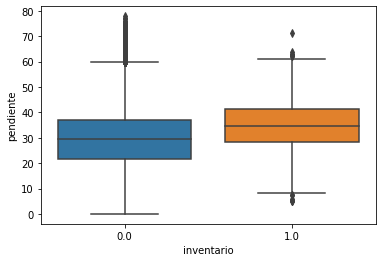

In [ ]:
sns.boxplot(data=df, x='inventario', y='pendiente');

In [ ]:
sns.histplot(data=df, x='inventario', hue='pendiente', bins=50);

In [ ]:
sns.histplot(x='inventario', data=df, hue='pendiente', bins=len(df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

## Análisis univariado

Para generar el histograma de una sola variable se puede utilizar el siguiente código con el método *hist*.:

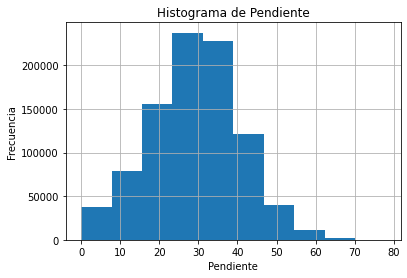

In [ ]:
X.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia');


Con la librearía *Seaborn* se puede generar el *displot* de las diferentes variables.

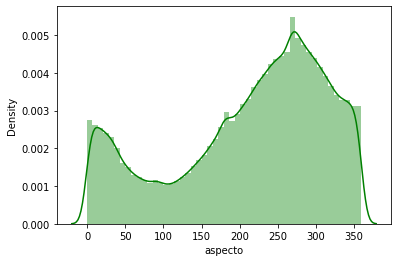

In [ ]:
sns.distplot(X['aspecto'],color='g');

Para generar el histograma de las variables continuas.

In [ ]:
X_cont.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10, 4));

ImportError: ignored

Para generar el diagrama de caja de cada variable:

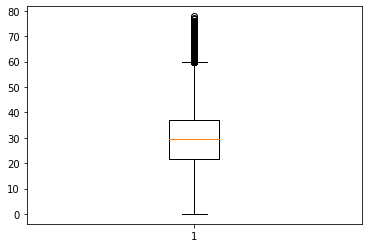

In [ ]:
pendiente=X['pendiente']
plt.boxplot(pendiente);

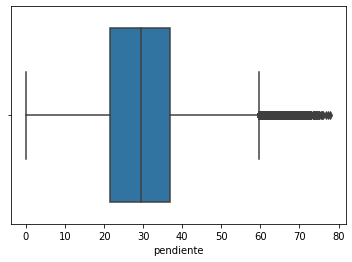

In [ ]:
sns.boxplot(x='pendiente', data=X);

El diagrama tipo Violin brinda información similar al *boxplot*, sin embargo en algunos casos puede brindar información adicional sobre la distribución de los datos.

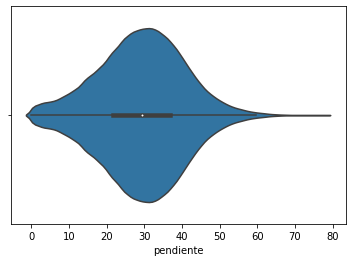

In [ ]:
sns.violinplot(x='pendiente', data=X);

## Análisis Bivariado

El análisis bivariado permite identificar asociación o correlación entre diferentes variables. Se utilizan las siguientes herramientas.

In [ ]:
sns.jointplot(x='pendiente', y='curvatura', data=X, kind='scatter');

In [ ]:
sns.jointplot(x='pendiente', y='flujo', data=X, kind='kde', color='g');

Un análisis muy importante es la distribución de cada variable independiente en función de la variable dependiente. Distribuciones diferentes permite inferir que dicha variable puede ser buena predictora.

Inicialmente se construyen dos nuevos dataFrames filtrando entre celdas donde la variabel independiente es 1 y celdas donde es 0, en este caso CON y SIN movimientos en masa.

In [ ]:
data_sin=df[(df['inventario']==0)]
data_con=df[(df['inventario']==1)]

Con estos dos DataFrames se pueden comparar las variables indepependientes en funcion de y.

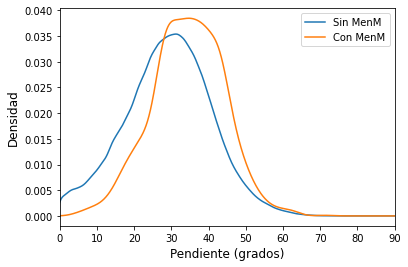

In [ ]:
fig, ax = plt.subplots()
data_sin['pendiente'].plot.kde(ax=ax, label='Sin MenM')
data_con['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (grados)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

## Análisis Multivariado

El análisis multivariado permite analizar tres o mas variables.

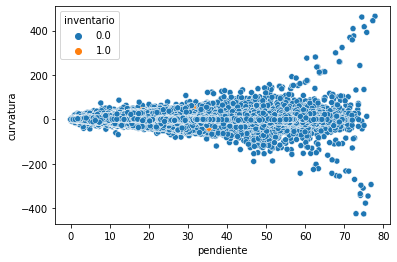

In [ ]:
sns.scatterplot(x="pendiente", y="curvatura", hue="inventario", data=df);

Una etapa fundamental en el análisis multivariado de los datos es evaluar la correlación entre ellos. Para lo cual existen diferentes herramientas. La librearía *statsmodel* brinda herramientas para identificar y plotear la matriz de correlación.

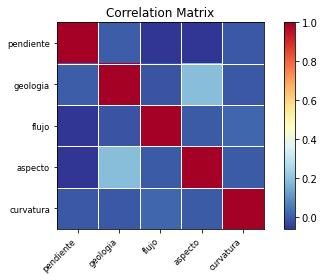

In [ ]:
import statsmodels.graphics.api as smg
MatCorre=DataFrame(X.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns));

Y la libraría *Seaborn* también tiene una función para plotear la matriz, donde a diferencia de las demas marca el valor de la correlación en cada celda.

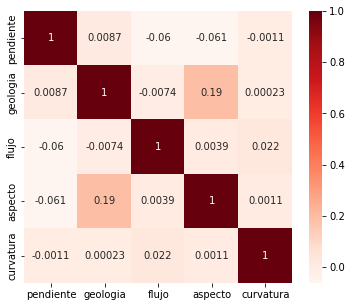

In [ ]:
plt.figure(figsize=(6,5))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()